In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2017)

# 导入数据

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], 
                    [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], 
                   [1.65], [2.904], [1.3]], dtype=np.float32)

* 来看看数据体的图像

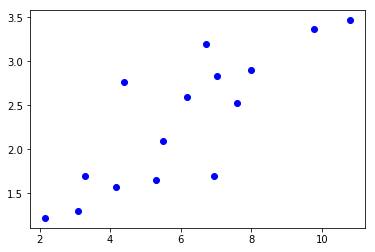

In [3]:
#%matplotlib inline

plt.plot(x_train, y_train, 'bo')

* 然后，把数据转换成 <font color=Darkorange>tensorflow</font> 的 <font color=Darkorange>tensor</font> 形式

In [4]:
x = tf.constant(x_train, name='x')
y = tf.constant(y_train, name='y')

# 定义一个线性模型

* 定义模型的 <font color=Darkorange>w</font> 以及 <font color=Darkorange>b</font> 参数
* 用 <font color=Darkorange>w, b</font> 定义这个线性模型

In [5]:


with tf.variable_scope('Linear_Model'):
    w = tf.Variable(initial_value=tf.random_normal(shape=(), seed=2017), dtype=tf.float32, name='weight')
    b = tf.Variable(initial_value=0, dtype=tf.float32, name='biase')
    y_pred = w * x + b
    
print(y_pred)

Tensor("Linear_Model/add:0", shape=(15, 1), dtype=float32)


注意 <font color=Darkorange>tf.variable_scope()</font> 这个函数，它是用来规定一个变量的 <font color=Darkorange>区域</font> 的，在这个 <font color=Darkorange>with</font> 语句下定义的所有变量都在同一个 <font color=Darkorange>变量域</font> 当中， <font color=Darkorange>域名</font> 就是 <font color=Darkorange>variable_scope()</font> 的参数。

那么它有什么用呢？

实际上，所有变量域中的变量的名字都以域名为前缀：

In [6]:
print(w.name)
print(b.name)
print(y_pred.name)

Linear_Model/weight:0
Linear_Model/biase:0
Linear_Model/add:0


In [7]:
# 开启交互式会话
sess = tf.InteractiveSession()

# 一定要有初始化这一步！！！
sess.run(tf.global_variables_initializer())

好了，现在可以看一下这个线性模型的数据具体长什么样了

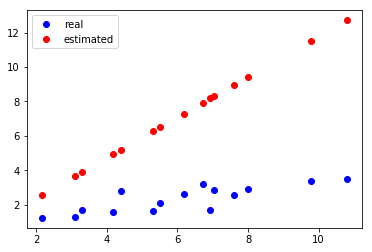

In [8]:
#%matplotlib inline

# 要先将‘tensor’的内容‘fetch’出来
y_pred_numpy = y_pred.eval(session=sess)

plt.plot(x_train, y_train, 'bo', label="real")
plt.plot(x_train, y_pred_numpy, 'ro', label='estimated')
plt.legend()

# 优化模型
    
<br>

* 定义误差函数   

前面提到过，为了优化模型，需要构建一个误差（<font color=Darkorange>loss</font>）函数，来告诉我们优化的好坏程度。
而这里，想要预测值和真实值尽可能接近，因此，就用 <font color=Darkorange>loss</font> 进行衡量。

In [9]:
loss = tf.reduce_mean(tf.square(y - y_pred))

# 看看在当前模型下的误差有多少
print(loss.eval(session = sess))

28.152376


* 现在用梯度下降法去优化这个模型
   
首先需要求解误差函数对于每个参数的梯度，通过求导只是可以知道是下面的形式：    
<center> 
    <big>
        $$ \frac{\partial}{\partial{w}} = \frac{2}{n}\sum_{i=1}^n{x_i(wx_i + b - y_i)}$$
        $$ \frac{\partial}{\partial{b}} = \frac{2}{n}\sum_{i=1}^n{(wx_i + b - y_i)}$$ 
    </big>
</center>
    
但实际上并不会这么去用，因为 <font color=Darkorange>tensorflow</font> 拥有自动求导功能，省去了这些数学知识以及手工求导的复杂工作。可以通过下面的代码去获得参数 <font color=Darkorange>loss</font> 函数对标量参数 <font color=Darkorange>w, b</font> 的导函数。

In [10]:
w_grad, b_grad = tf.gradients(loss, [w, b])

print('w_grad: %.4f' % w_grad.eval(session = sess))
print('b_grad: %.4f' % b_grad.eval(session = sess))

w_grad: 68.7412
b_grad: 9.6534


对梯度乘上一个 <font color=Darkorange>步长(lr)</font> 来更新桉树。一般把这个步长称为学习率。

In [11]:
lr = 1e-2

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

sess.run([w_update, b_update])

[0.49174082, -0.09653385]

在更新参数完成后，再一次看看模型的输出结果

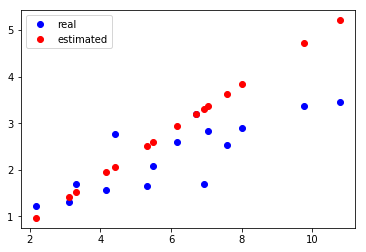

In [12]:
%matplotlib inline

y_pred_numpy = y_pred.eval(session = sess)

plt.plot(x_train, y_train, 'bo', label = 'real')
plt.plot(x_train, y_pred_numpy, 'ro', label = 'estimated')
plt.legend()

更新一次之后，发现红色点跑到了蓝色点附近，相比之前靠得更近了，说明通过梯度下降模型得到了优化。当然可以多更新几次

<IPython.core.display.Javascript object>


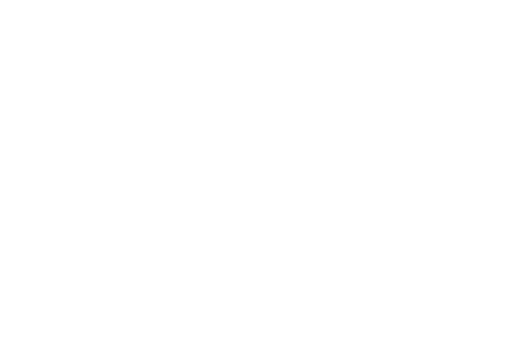

epoch: 0, loss: 0.6212941408157349
epoch: 1, loss: 0.2677772343158722
epoch: 2, loss: 0.2607705891132355
epoch: 3, loss: 0.2601791024208069
epoch: 4, loss: 0.2597087323665619
epoch: 5, loss: 0.2592428922653198
epoch: 6, loss: 0.2587795853614807
epoch: 7, loss: 0.25831854343414307
epoch: 8, loss: 0.2578599452972412
epoch: 9, loss: 0.2574036419391632


<IPython.core.display.Javascript object>


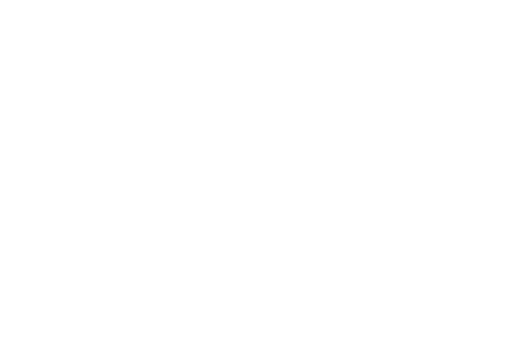

In [13]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(10):
    sess.run([w_update, b_update])
    
    y_pred_numpy = y_pred.eval(session = sess)
    loss_numpy = loss.eval(session = sess)
    
    ax.clear()
    ax.plot(x_train, y_train, 'bo', label = 'real')
    ax.plot(x_train, y_pred_numpy, 'ro', label = 'estimated')
    ax.legend()
    fig.canvas.draw()
    plt.pause(0.5)
    
    print('epoch: {}, loss: {}'.format(e, loss_numpy))

再来看看最后的模型结果吧

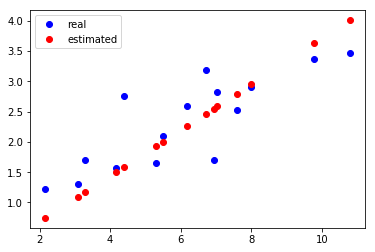

In [14]:
%matplotlib inline

plt.plot(x_train, y_train, 'bo', label = 'real')
plt.plot(x_train, y_pred_numpy, 'ro', label = 'estimated')
plt.legend()
with tf.Session() as sess:
    graph_writer = tf.summary.FileWriter('.', sess.graph)
sess.close()

# 多项式回归

In [15]:
# 将之前的‘graph’清除

tf.reset_default_graph()


# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) #定义参数
b_target = np.array([0.9]) #定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(b_target[0], w_target[0], w_target[1], w_target[2])
print(f_des) #打印出函数的式子

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


同样地，来看看这个多项式的图像

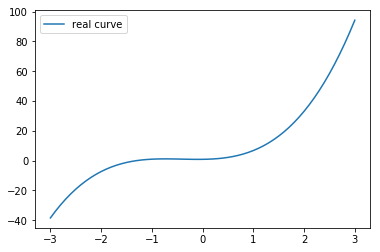

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt


#画出这个函数的曲线
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label = 'real curve')
plt.legend()

首先构造形如[$x, x^2, x^3$]这样的数据,把多项式回归问题转换为线性回归问题

In [17]:
x_train = np.stack([x_sample ** i for i in range(1, 4)], axis = 1)
x_train = tf.constant(x_train, dtype = tf.float32, name = 'x_train')
y_train = tf.constant(y_sample, dtype = tf.float32, name = 'y_train')

构造线性模型

In [18]:
w = tf.Variable(initial_value = tf.random_normal(shape = (3, 1)), dtype = tf.float32, name = 'weights')
b = tf.Variable(initial_value = 0, dtype = tf.float32, name = 'bias')

def multi_linear(x):
    return tf.squeeze(tf.matmul(x, w) + b)

y_ = multi_linear(x_train)
print(y_)

Tensor("Squeeze:0", shape=(61,), dtype=float32)


In [19]:
sess = tf.InteractiveSession()

D:\WORKING\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


画出模型输出的结果和真实结果的对比

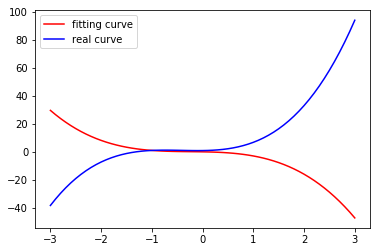

In [20]:
%matplotlib inline

sess.run(tf.global_variables_initializer())

x_train_value = x_train.eval(session = sess)
y_train_value = y_train.eval(session = sess)
y_pred_value = y_.eval(session = sess)


plt.plot(x_train_value[:, 0], y_pred_value, label = 'fitting curve', color = 'r')
plt.plot(x_train_value[:, 0], y_train_value, label = 'real curve', color = 'b')
plt.legend()

同样地，定义 <font color=Darkorange>loss</font> 函数

In [21]:
loss = tf.reduce_mean(tf.square(y_train - y_))
loss_numpy = sess.run(loss)
print(loss_numpy)

2066.421


In [22]:
#利用‘tf.gradients()’自动求解导数
w_grad, b_grad = tf.gradients(loss, [w, b])

print(w_grad.eval(session = sess))
print(b_grad.eval(session = sess))

[[-136.86932]
 [-143.24081]
 [-901.17816]]
-26.479244


In [23]:
#利用梯度下降更新参数
lr = 1e-3

w_update = w.assign_sub(lr * w_grad)
b_update = b.assign_sub(lr * b_grad)

来看看更新一次之后的效果

Text(0.5, 1.0, 'loss: 1312.2684')

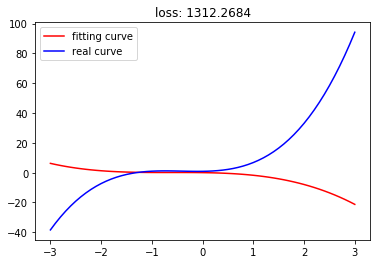

In [24]:
%matplotlib inline

sess.run([w_update, b_update])

x_train_value = x_train.eval(session = sess)
y_train_value = y_train.eval(session = sess)
y_pred_value = y_.eval(session = sess)
loss_numpy = loss.eval(session = sess)

plt.plot(x_train_value[:, 0], y_pred_value, label = 'fitting curve', color = 'r')
plt.plot(x_train_value[:, 0], y_train_value, label = 'real curve', color = 'b')
plt.legend()
plt.title('loss: %.4f' % loss_numpy)

可以看到，一次更新的效果并不好，那多尝试几次

<IPython.core.display.Javascript object>


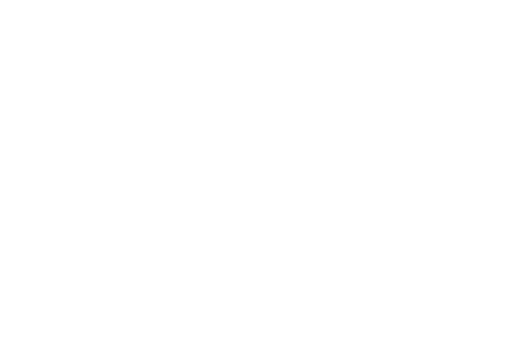

epoch: 20, loss: 58.88898468017578
epoch: 40, loss: 14.23537540435791
epoch: 60, loss: 3.8041911125183105
epoch: 80, loss: 1.3515106439590454
epoch: 100, loss: 0.7615448832511902


<IPython.core.display.Javascript object>


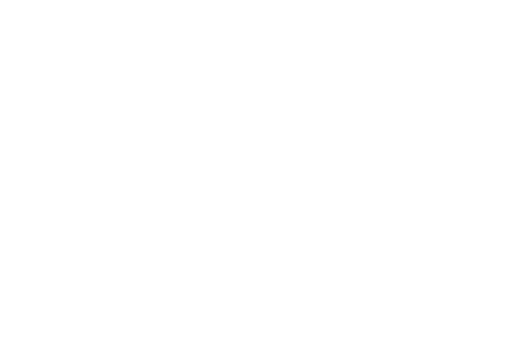

In [25]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

sess.run(tf.global_variables_initializer())

for e in range(100):
    sess.run([w_update, b_update])
    x_train_value = x_train.eval(session = sess)
    y_train_value = y_train.eval(session = sess)
    y_pred_value = y_.eval(session = sess)
    loss_numpy = loss.eval(session = sess)
    
    ax.clear()
    ax.plot(x_train_value[:, 0], y_pred_value, label = 'fitting curve', color = 'r')
    ax.plot(x_train_value[:, 0], y_train_value, label = 'real curve', color = 'b')
    ax.legend()
    
    fig.canvas.draw()
    plt.pause(0.1)
    
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e + 1, loss_numpy))

可以看到，经过100次更新之后，可以看到拟合的线和真实的线已经完全重合了